In [28]:
import pandas as pd
import yfinance as yf
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Question 1: Use yfinance to Extract Tesla Stock Data

In [47]:
tesla = yf.Ticker("TSLA")

In [48]:
tesla_data = tesla.history(period="max")

In [49]:
tesla_data.reset_index(inplace=True)

In [50]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [76]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [67]:
soup = BeautifulSoup(data,"html5lib")

In [73]:
#We create an empty dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#We extract the desired data from the 'soup' object and save it in the dataframe
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date":date, "Revenue":revenue}, index=[0])
    tesla_revenue = pd.concat([tesla_revenue, new_row])

tesla_revenue.tail()

,Date,Revenue
0,2013,"$2,013"
0,2012,$413
0,2011,$204
0,2010,$117
0,2009,$112


# Question 3: Use yfinance to Extract GameStop Stock Data

In [51]:
gme = yf.Ticker("GME")

In [52]:
gme_data = gme.history(period="max")

In [53]:
gme_data.reset_index(inplace=True)

In [54]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [77]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text

In [78]:
soup = BeautifulSoup(data,"html5lib")

In [80]:
#We create an empty dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#We extract the desired data from the 'soup' object and save it in the dataframe
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date":date, "Revenue":revenue}, index=[0])
    gme_revenue = pd.concat([gme_revenue, new_row])

gme_revenue.tail()

,Date,Revenue
0,2013,"$2,013"
0,2012,$413
0,2011,$204
0,2010,$117
0,2009,$112


# Question 5: Plot Tesla Stock Graph

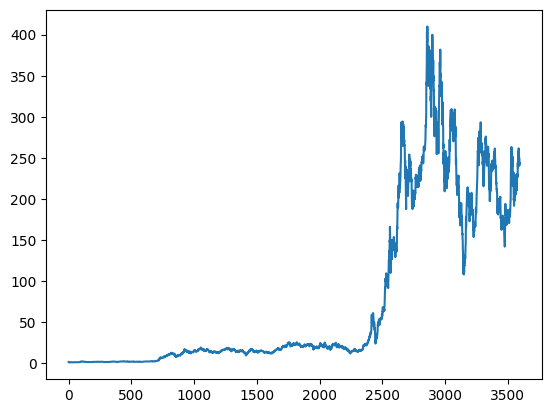

0         1.592667
1         1.588667
2         1.464000
3         1.280000
4         1.074000
           ...    
3590    240.660004
3591    250.080002
3592    240.830002
3593    244.500000
3594    244.149994
Name: Close, Length: 3595, dtype: float64

In [40]:
plt.plot(tesla_data["Close"])
plt.show()

# Question 6: Plot Game Stop Stock Graph

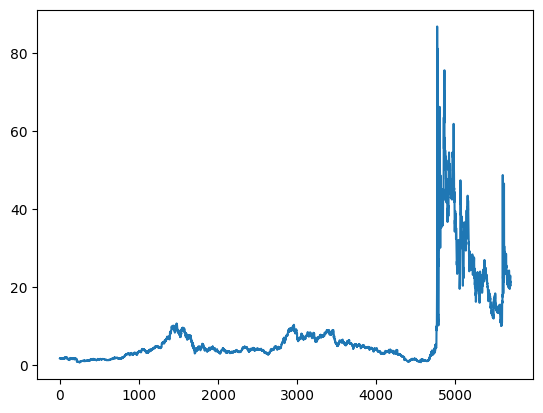

In [42]:
plt.plot(gme_data["Close"])
plt.show()